In [2]:
#Tools importing

#Data analysis and wrangling
import numpy as np
import pandas as pd 

#Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

#Machine learning
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn.metrics import jaccard_similarity_score
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

#File handling
import os
path=os.getcwd()
datadir=os.path.join(path,'datas')
print(os.listdir(datadir))


['gender_submission.csv', 'test.csv', 'titanic.zip', 'train.csv']


In [3]:
traindata=pd.read_csv(os.path.join(datadir,'train.csv'))
testdata=pd.read_csv(os.path.join(datadir,'test.csv'))
combined=[traindata,testdata]

In [4]:
%%time
traindata.head()

Wall time: 0 ns


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
traindata.info()
print('_'*40)
testdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null

In [6]:
traindata.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
traindata.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Baclini, Miss. Eugenie",male,1601,G6,S
freq,1,577,7,4,644


In [8]:
traindata[['Pclass','Survived']].groupby(['Pclass'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [9]:
traindata[['Sex','Survived']].groupby(['Sex'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [10]:
traindata[['SibSp','Survived']].groupby(['SibSp'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [11]:
traindata[['Parch','Survived']].groupby(['Parch'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


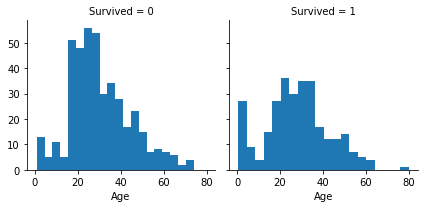

In [12]:
g1=sns.FacetGrid(traindata,col='Survived')
g1.map(plt.hist,'Age',bins=20)

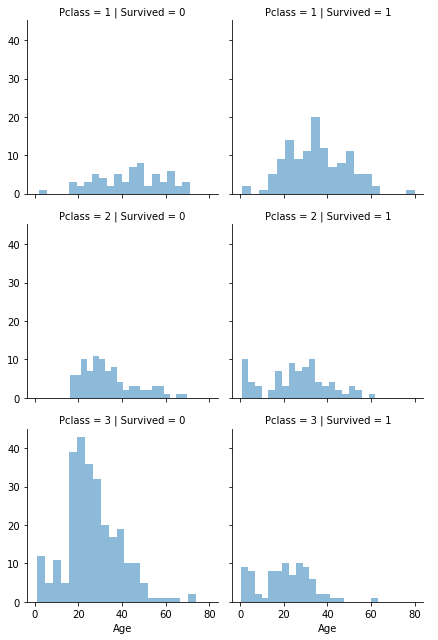

In [13]:
g2=sns.FacetGrid(traindata,col='Survived',row='Pclass')
g2.map(plt.hist,'Age',alpha=.5,bins=20)
g2.add_legend()

c:\users\sephiroth\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
c:\users\sephiroth\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
c:\users\sephiroth\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\axisgrid.py:720: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


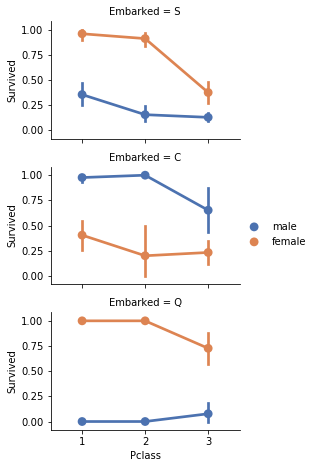

In [14]:
g3=sns.FacetGrid(traindata,row='Embarked',size=2.2,aspect=1.6)
g3.map(sns.pointplot,'Pclass','Survived','Sex',palette='deep')
g3.add_legend()

c:\users\sephiroth\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


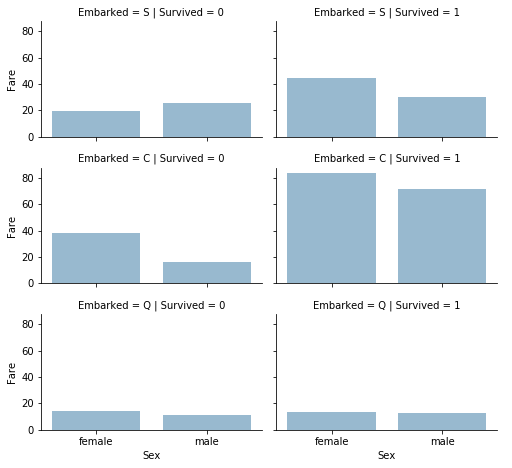

In [15]:
g4=sns.FacetGrid(traindata,col='Survived',row='Embarked',size=2.2,aspect=1.6)
g4.map(sns.barplot,'Sex','Fare',alpha=.5,ci=None)
g4.add_legend()

In [16]:
columnchoicetrain=traindata[['Pclass','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked','Name','Survived']]
columnchoicetest=testdata[['Pclass','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked','Name']]
columnchoicetrain.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name,Survived
0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,"Braund, Mr. Owen Harris",0
1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1
2,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"Heikkinen, Miss. Laina",1
3,1,female,35.0,1,0,113803,53.1000,C123,S,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1
4,3,male,35.0,0,0,373450,8.0500,NaN,S,"Allen, Mr. William Henry",0


In [17]:
columnchoicetrain.Sex[columnchoicetrain.Sex=='female']=0
columnchoicetrain.Sex[columnchoicetrain.Sex=='male']=1
columnchoicetest.Sex[columnchoicetest.Sex=='female']=0
columnchoicetest.Sex[columnchoicetest.Sex=='male']=1
columnchoicetrain.head()

c:\users\sephiroth\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
c:\users\sephiroth\appdata\local\programs\python\python37-32\lib\site-packages\pandas\core\generic.py:9114: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
c:\users\sephiroth\appdata\local\programs\python\python37-32\lib\site-packages\IPython\core\interactiveshell.py:3319: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentatio

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name,Survived
0,3,1,22.0,1,0,A/5 21171,7.2500,NaN,S,"Braund, Mr. Owen Harris",0
1,1,0,38.0,1,0,PC 17599,71.2833,C85,C,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1
2,3,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"Heikkinen, Miss. Laina",1
3,1,0,35.0,1,0,113803,53.1000,C123,S,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1
4,3,1,35.0,0,0,373450,8.0500,NaN,S,"Allen, Mr. William Henry",0


In [18]:
freq_port=columnchoicetrain.Embarked.dropna().mode()[0]
columnchoicetrain.Embarked=columnchoicetrain.Embarked.fillna(freq_port)
columnchoicetest.Embarked=columnchoicetest.Embarked.fillna(freq_port)
columnchoicetrain.Embarked[columnchoicetrain.Embarked=='S']=0
columnchoicetrain.Embarked[columnchoicetrain.Embarked=='C']=1
columnchoicetrain.Embarked[columnchoicetrain.Embarked=='Q']=2
columnchoicetest.Embarked[columnchoicetest.Embarked=='S']=0
columnchoicetest.Embarked[columnchoicetest.Embarked=='C']=1
columnchoicetest.Embarked[columnchoicetest.Embarked=='Q']=2
columnchoicetrain.head()

c:\users\sephiroth\appdata\local\programs\python\python37-32\lib\site-packages\pandas\core\generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
c:\users\sephiroth\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
c:\users\sephiroth\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveat

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name,Survived
0,3,1,22.0,1,0,A/5 21171,7.2500,NaN,0,"Braund, Mr. Owen Harris",0
1,1,0,38.0,1,0,PC 17599,71.2833,C85,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1
2,3,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,"Heikkinen, Miss. Laina",1
3,1,0,35.0,1,0,113803,53.1000,C123,0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1
4,3,1,35.0,0,0,373450,8.0500,NaN,0,"Allen, Mr. William Henry",0


In [19]:
bins=[0,6,60,80]
columnchoicetrain['Age_cut']=pd.cut(columnchoicetrain.Age,bins)
columnchoicetest['Age_cut']=pd.cut(columnchoicetest.Age,bins)
print(columnchoicetrain.Age_cut.value_counts())
columnchoicetrain[['Age_cut','Survived']].groupby(['Age_cut'],as_index=False).mean().sort_values(by='Survived',ascending=False)

(6, 60]     645
(0, 6]       47
(60, 80]     22
Name: Age_cut, dtype: int64


,Age_cut,Survived
0,"(0, 6]",0.702128
1,"(6, 60]",0.390698
2,"(60, 80]",0.227273


In [20]:
columnchoicetrain['Age_is_Null']=columnchoicetrain['Age'].apply(lambda x: 1 if pd.isnull(x) else 0)
columnchoicetest['Age_is_Null']=columnchoicetest['Age'].apply(lambda x: 1 if pd.isnull(x) else 0)

In [21]:
columnchoicetrain[['Age','Pclass','Sex']].groupby(['Pclass','Sex'],as_index=False).mean()

,Pclass,Sex,Age
0,1,0,34.611765
1,1,1,41.281386
2,2,0,28.722973
3,2,1,30.740707
4,3,0,21.750000
5,3,1,26.507589


In [22]:
age_means=columnchoicetrain.groupby(['Sex','Pclass'])['Age']
columnchoicetrain.Age=age_means.transform(lambda x: x.fillna(x.mean()))
columnchoicetest.Age=age_means.transform(lambda x: x.fillna(x.mean()))
print(age_means)
columnchoicetrain.head(6)

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name,Survived,Age_cut,Age_is_Null
0,3,1,22.000000,1,0,A/5 21171,7.2500,NaN,0,"Braund, Mr. Owen Harris",0,"(6.0, 60.0]",0
1,1,0,38.000000,1,0,PC 17599,71.2833,C85,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,"(6.0, 60.0]",0
2,3,0,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,0,"Heikkinen, Miss. Laina",1,"(6.0, 60.0]",0
3,1,0,35.000000,1,0,113803,53.1000,C123,0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,"(6.0, 60.0]",0
4,3,1,35.000000,0,0,373450,8.0500,NaN,0,"Allen, Mr. William Henry",0,"(6.0, 60.0]",0
5,3,1,26.507589,0,0,330877,8.4583,NaN,2,"Moran, Mr. James",0,NaN,1


In [23]:
bins=[0,6,60,80]
columnchoicetrain['Age_cut']=pd.cut(columnchoicetrain.Age,bins)
columnchoicetest['Age_cut']=pd.cut(columnchoicetest.Age,bins)
columnchoicetrain=pd.concat([columnchoicetrain.drop(['Age_cut'],axis=1),pd.get_dummies(columnchoicetrain['Age_cut'],prefix='Age_cut')],axis=1)
columnchoicetrain=columnchoicetrain.drop(['Age_cut_(6, 60]'],axis=1)
columnchoicetest=pd.concat([columnchoicetest.drop(['Age_cut'],axis=1),pd.get_dummies(columnchoicetest['Age_cut'],prefix='Age_cut')],axis=1)
columnchoicetest=columnchoicetest.drop(['Age_cut_(6, 60]'],axis=1)
columnchoicetrain.head(6)

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name,Survived,Age_is_Null,"Age_cut_(0, 6]","Age_cut_(60, 80]"
0,3,1,22.000000,1,0,A/5 21171,7.2500,NaN,0,"Braund, Mr. Owen Harris",0,0,0,0
1,1,0,38.000000,1,0,PC 17599,71.2833,C85,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0,0,0
2,3,0,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,0,"Heikkinen, Miss. Laina",1,0,0,0
3,1,0,35.000000,1,0,113803,53.1000,C123,0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0,0,0
4,3,1,35.000000,0,0,373450,8.0500,NaN,0,"Allen, Mr. William Henry",0,0,0,0
5,3,1,26.507589,0,0,330877,8.4583,NaN,2,"Moran, Mr. James",0,1,0,0


In [24]:
columnchoicetrain.Fare=columnchoicetrain.Fare.fillna(columnchoicetrain.Fare.mean())
columnchoicetest.Fare=columnchoicetest.Fare.fillna(columnchoicetrain.Fare.mean())
columnchoicetrain.head(6)

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name,Survived,Age_is_Null,"Age_cut_(0, 6]","Age_cut_(60, 80]"
0,3,1,22.000000,1,0,A/5 21171,7.2500,NaN,0,"Braund, Mr. Owen Harris",0,0,0,0
1,1,0,38.000000,1,0,PC 17599,71.2833,C85,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0,0,0
2,3,0,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,0,"Heikkinen, Miss. Laina",1,0,0,0
3,1,0,35.000000,1,0,113803,53.1000,C123,0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0,0,0
4,3,1,35.000000,0,0,373450,8.0500,NaN,0,"Allen, Mr. William Henry",0,0,0,0
5,3,1,26.507589,0,0,330877,8.4583,NaN,2,"Moran, Mr. James",0,1,0,0


In [25]:
columnchoicetrain['Name_Length']=columnchoicetrain.Name.apply(len)
columnchoicetest['Name_Length']=columnchoicetest.Name.apply(len)
columnchoicetrain['Title']=columnchoicetrain['Name'].str.split(', ').str[1]
print(columnchoicetrain['Title'][0])
columnchoicetrain['Title']=columnchoicetrain['Title'].str.split('.').str[0]
print(columnchoicetrain['Title'][0])
columnchoicetest['Title']=columnchoicetest['Name'].str.split(', ').str[1]
print(columnchoicetest['Title'][0])
columnchoicetest['Title']=columnchoicetest['Title'].str.split('.').str[0]
print(columnchoicetest['Title'][0])
columnchoicetrain=columnchoicetrain.drop(['Name'], axis=1)
columnchoicetest=columnchoicetest.drop(['Name'], axis=1)

Mr. Owen Harris
Mr
Mr. James
Mr


In [26]:
columnchoicetrain.head(6)

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Age_is_Null,"Age_cut_(0, 6]","Age_cut_(60, 80]",Name_Length,Title
0,3,1,22.000000,1,0,A/5 21171,7.2500,NaN,0,0,0,0,0,23,Mr
1,1,0,38.000000,1,0,PC 17599,71.2833,C85,1,1,0,0,0,51,Mrs
2,3,0,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,0,1,0,0,0,22,Miss
3,1,0,35.000000,1,0,113803,53.1000,C123,0,1,0,0,0,44,Mrs
4,3,1,35.000000,0,0,373450,8.0500,NaN,0,0,0,0,0,24,Mr
5,3,1,26.507589,0,0,330877,8.4583,NaN,2,0,1,0,0,16,Mr


In [27]:
pd.crosstab(columnchoicetrain.Title,columnchoicetrain.Sex)

Sex,0,1
Title,,
Capt,0,1
Col,0,2
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40
Miss,182,0


In [28]:
pd.crosstab(columnchoicetest.Title,columnchoicetest.Sex)

Sex,0,1
Title,,
Col,0,2
Dona,1,0
Dr,0,1
Master,0,21
Miss,78,0
Mr,0,240
Mrs,72,0
Ms,1,0
Rev,0,2


In [29]:
columnchoicetrain.Title= columnchoicetrain.Title.replace(['the Countess','Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer'], 'Rare')
columnchoicetrain.Title=columnchoicetrain.Title.replace(['Lady','Mlle', 'Ms'], 'Mrs')
columnchoicetrain.Title=columnchoicetrain.Title.replace(['Mme'], 'Miss')
columnchoicetest.Title=columnchoicetest.Title.replace(['Col', 'Dona', 'Dr', 'Rev'], 'Rare')
columnchoicetest.Title=columnchoicetest.Title.replace(['Ms'], 'Mrs')
pd.crosstab(columnchoicetrain.Title,columnchoicetrain.Sex)

Sex,0,1
Title,,
Master,0,40
Miss,183,0
Mr,0,517
Mrs,129,0
Rare,2,20


In [30]:
pd.crosstab(columnchoicetest.Title,columnchoicetest.Sex)

Sex,0,1
Title,,
Master,0,21
Miss,78,0
Mr,0,240
Mrs,73,0
Rare,1,5


In [31]:
columnchoicetrain.Title[columnchoicetrain.Title == 'Master'] = 0
columnchoicetrain.Title[columnchoicetrain.Title == 'Miss'] = 1
columnchoicetrain.Title[columnchoicetrain.Title == 'Mr'] = 2
columnchoicetrain.Title[columnchoicetrain.Title == 'Mrs'] = 3
columnchoicetrain.Title[columnchoicetrain.Title == 'Rare'] = 4
columnchoicetest.Title[columnchoicetest.Title == 'Master'] = 0
columnchoicetest.Title[columnchoicetest.Title == 'Miss'] = 1
columnchoicetest.Title[columnchoicetest.Title == 'Mr'] = 2
columnchoicetest.Title[columnchoicetest.Title == 'Mrs'] = 3
columnchoicetest.Title[columnchoicetest.Title == 'Rare'] = 4
columnchoicetrain.head(6)

c:\users\sephiroth\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
c:\users\sephiroth\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\sephiroth\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/u

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Age_is_Null,"Age_cut_(0, 6]","Age_cut_(60, 80]",Name_Length,Title
0,3,1,22.000000,1,0,A/5 21171,7.2500,NaN,0,0,0,0,0,23,2
1,1,0,38.000000,1,0,PC 17599,71.2833,C85,1,1,0,0,0,51,3
2,3,0,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,0,1,0,0,0,22,1
3,1,0,35.000000,1,0,113803,53.1000,C123,0,1,0,0,0,44,3
4,3,1,35.000000,0,0,373450,8.0500,NaN,0,0,0,0,0,24,2
5,3,1,26.507589,0,0,330877,8.4583,NaN,2,0,1,0,0,16,2


In [32]:
columnchoicetrain['Ticket_len']=columnchoicetrain.Ticket.apply(len)
columnchoicetest['Ticket_len']=columnchoicetest.Ticket.apply(len)
columnchoicetrain[['Ticket_len','Survived']].groupby(['Ticket_len'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,Ticket_len,Survived
2,5,0.618321
5,8,0.539474
13,17,0.428571
9,12,0.400000
10,13,0.400000
1,4,0.366337
7,10,0.341463
11,15,0.333333
3,6,0.319809
4,7,0.296296


In [33]:
columnchoicetrain['Ticket_letter']=columnchoicetrain.Ticket.str[0]
columnchoicetest['Ticket_letter']=columnchoicetest.Ticket.str[0]
columnchoicetrain[['Ticket_letter','Survived']].groupby(['Ticket_letter'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,Ticket_letter,Survived
8,9,1.000000
13,P,0.646154
0,1,0.630137
11,F,0.571429
1,2,0.464481
10,C,0.340426
14,S,0.323077
12,L,0.250000
2,3,0.239203
3,4,0.200000


In [34]:
columnchoicetrain['Ticket_letter'] = columnchoicetrain['Ticket_letter'].replace(['W', '4', '7', '6', 'L', '5', '8'], 'Rare_Low_Surv')
columnchoicetrain['Ticket_letter'] = columnchoicetrain['Ticket_letter'].replace(['F', '9'], 'Rare_High_Surv')
columnchoicetest['Ticket_letter'] = columnchoicetest['Ticket_letter'].replace(['W', '4', '7', '6', 'L', '5', '8'], 'Rare_Low_Surv')
columnchoicetest['Ticket_letter'] = columnchoicetest['Ticket_letter'].replace(['F', '9'], 'Rare_High_Surv')
columnchoicetrain.tail()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Age_is_Null,"Age_cut_(0, 6]","Age_cut_(60, 80]",Name_Length,Title,Ticket_len,Ticket_letter
886,2,1,27.00,0,0,211536,13.00,NaN,0,0,0,0,0,21,4,6,2
887,1,0,19.00,0,0,112053,30.00,B42,0,1,0,0,0,28,1,6,1
888,3,0,21.75,1,2,W./C. 6607,23.45,NaN,0,0,1,0,0,40,1,10,Rare_Low_Surv
889,1,1,26.00,0,0,111369,30.00,C148,1,1,0,0,0,21,2,6,1
890,3,1,32.00,0,0,370376,7.75,NaN,2,0,0,0,0,19,2,6,3


In [35]:
columnchoicetrain=pd.concat([columnchoicetrain.drop(['Ticket','Ticket_letter'],axis=1),pd.get_dummies(columnchoicetrain.Ticket_letter,prefix='Ticket_letter')],axis=1)
columnchoicetest=pd.concat([columnchoicetest.drop(['Ticket','Ticket_letter'],axis=1),pd.get_dummies(columnchoicetest.Ticket_letter,prefix='Ticket_letter')],axis=1)
columnchoicetrain.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Survived,Age_is_Null,...,Ticket_len,Ticket_letter_1,Ticket_letter_2,Ticket_letter_3,Ticket_letter_A,Ticket_letter_C,Ticket_letter_P,Ticket_letter_Rare_High_Surv,Ticket_letter_Rare_Low_Surv,Ticket_letter_S
0,3,1,22.0,1,0,7.2500,NaN,0,0,0,...,9,0,0,0,1,0,0,0,0,0
1,1,0,38.0,1,0,71.2833,C85,1,1,0,...,8,0,0,0,0,0,1,0,0,0
2,3,0,26.0,0,0,7.9250,NaN,0,1,0,...,16,0,0,0,0,0,0,0,0,1
3,1,0,35.0,1,0,53.1000,C123,0,1,0,...,6,1,0,0,0,0,0,0,0,0
4,3,1,35.0,0,0,8.0500,NaN,0,0,0,...,6,0,0,1,0,0,0,0,0,0


In [36]:
columnchoicetrain.Cabin=columnchoicetrain.Cabin.fillna('N0')
columnchoicetest.Cabin=columnchoicetest.Cabin.fillna('N0')
columnchoicetrain['Cabin_letter']=columnchoicetrain.Cabin.str[0]
columnchoicetest['Cabin_letter']=columnchoicetest.Cabin.str[0]
print(columnchoicetrain.Cabin_letter.value_counts())
print(columnchoicetest.Cabin_letter.value_counts())
columnchoicetrain[['Cabin_letter','Survived']].groupby(['Cabin_letter'],as_index=False).mean().sort_values(by='Survived',ascending=False)

N    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin_letter, dtype: int64
N    327
C     35
B     18
D     13
E      9
F      8
A      7
G      1
Name: Cabin_letter, dtype: int64


,Cabin_letter,Survived
3,D,0.757576
4,E,0.750000
1,B,0.744681
5,F,0.615385
2,C,0.593220
6,G,0.500000
0,A,0.466667
7,N,0.299854
8,T,0.000000


In [37]:
columnchoicetrain['Cabin_number']=columnchoicetrain.Cabin.str.split(' ').str[-1].str[1:]
columnchoicetest['Cabin_number']=columnchoicetest.Cabin.str.split(' ').str[-1].str[1:]
columnchoicetrain.Cabin_number=columnchoicetrain.Cabin_number.replace(['0'],np.NaN)
columnchoicetest.Cabin_number=columnchoicetest.Cabin_number.replace(['0'],np.NaN)
columnchoicetrain.Cabin_number=columnchoicetrain.Cabin_number.apply(lambda x:int(x) if not pd.isnull(x) and x!='' else np.NaN)
columnchoicetest.Cabin_number=columnchoicetest.Cabin_number.apply(lambda x:int(x) if not pd.isnull(x) and x!='' else np.NaN)
columnchoicetrain['Cabin_number_cut']=pd.qcut(columnchoicetrain.Cabin_number,4)
columnchoicetest['Cabin_number_cut']=pd.qcut(columnchoicetest.Cabin_number,4)
columnchoicetrain=pd.concat([columnchoicetrain.drop(['Cabin_number','Cabin_number_cut'],axis=1),pd.get_dummies(columnchoicetrain['Cabin_number_cut'],prefix="Cabin_num")],axis=1)
columnchoicetest=pd.concat([columnchoicetest.drop(['Cabin_number','Cabin_number_cut'],axis=1),pd.get_dummies(columnchoicetest['Cabin_number_cut'],prefix="Cabin_num")],axis=1)
columnchoicetrain.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Survived,Age_is_Null,...,Ticket_letter_C,Ticket_letter_P,Ticket_letter_Rare_High_Surv,Ticket_letter_Rare_Low_Surv,Ticket_letter_S,Cabin_letter,"Cabin_num_(1.999, 24.0]","Cabin_num_(24.0, 43.0]","Cabin_num_(43.0, 77.25]","Cabin_num_(77.25, 148.0]"
0,3,1,22.0,1,0,7.2500,N0,0,0,0,...,0,0,0,0,0,N,0,0,0,0
1,1,0,38.0,1,0,71.2833,C85,1,1,0,...,0,1,0,0,0,C,0,0,0,1
2,3,0,26.0,0,0,7.9250,N0,0,1,0,...,0,0,0,0,1,N,0,0,0,0
3,1,0,35.0,1,0,53.1000,C123,0,1,0,...,0,0,0,0,0,C,0,0,0,1
4,3,1,35.0,0,0,8.0500,N0,0,0,0,...,0,0,0,0,0,N,0,0,0,0


In [38]:
#we handle the cabin_letter=T that is found in train set and not in test set (we drop it to N because they have low survival rate and he didn't survive)
columnchoicetrain.Cabin_letter=columnchoicetrain.Cabin_letter.replace(['T'],'N')
columnchoicetrain=pd.concat([columnchoicetrain.drop(['Cabin','Cabin_letter'],axis=1),pd.get_dummies(columnchoicetrain.Cabin_letter,prefix='Cabin_letter')],axis=1)
columnchoicetest=pd.concat([columnchoicetest.drop(['Cabin','Cabin_letter'],axis=1),pd.get_dummies(columnchoicetest.Cabin_letter,prefix='Cabin_letter')],axis=1)
columnchoicetrain.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived,Age_is_Null,"Age_cut_(0, 6]",...,"Cabin_num_(43.0, 77.25]","Cabin_num_(77.25, 148.0]",Cabin_letter_A,Cabin_letter_B,Cabin_letter_C,Cabin_letter_D,Cabin_letter_E,Cabin_letter_F,Cabin_letter_G,Cabin_letter_N
0,3,1,22.0,1,0,7.2500,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,0,38.0,1,0,71.2833,1,1,0,0,...,0,1,0,0,1,0,0,0,0,0
2,3,0,26.0,0,0,7.9250,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,0,35.0,1,0,53.1000,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0
4,3,1,35.0,0,0,8.0500,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [39]:
columnchoicetrain['Family']=columnchoicetrain.SibSp+columnchoicetrain.Parch
columnchoicetest['Family']=columnchoicetest.SibSp+columnchoicetest.Parch
print(columnchoicetrain.Family.value_counts())
print(columnchoicetest.Family.value_counts())

0     537
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: Family, dtype: int64
0     253
1      74
2      57
3      14
4       7
10      4
6       4
5       3
7       2
Name: Family, dtype: int64


In [40]:
columnchoicetrain.Family=columnchoicetrain.Family.replace([0],'Alone')
columnchoicetrain.Family=columnchoicetrain.Family.replace([1,2,3],'Little_Family')
columnchoicetrain.Family=columnchoicetrain.Family.replace([4,5,6,7,10],'Big_Family')
columnchoicetest.Family=columnchoicetest.Family.replace([0],'Alone')
columnchoicetest.Family=columnchoicetest.Family.replace([1,2,3],'Little_Family')
columnchoicetest.Family=columnchoicetest.Family.replace([4,5,6,7,10],'Big_Family')
columnchoicetrain[['Family','Survived']].groupby('Family',as_index=False).mean().sort_values(by='Survived',ascending=False)

,Family,Survived
2,Little_Family,0.578767
0,Alone,0.303538
1,Big_Family,0.161290


In [41]:
columnchoicetrain=pd.concat([columnchoicetrain.drop(['SibSp','Parch','Family'],axis=1),pd.get_dummies(columnchoicetrain.Family,prefix='Family')],axis=1)
columnchoicetest=pd.concat([columnchoicetest.drop(['SibSp','Parch','Family'],axis=1),pd.get_dummies(columnchoicetest.Family,prefix='Family')],axis=1)
columnchoicetrain.head()

,Pclass,Sex,Age,Fare,Embarked,Survived,Age_is_Null,"Age_cut_(0, 6]","Age_cut_(60, 80]",Name_Length,...,Cabin_letter_B,Cabin_letter_C,Cabin_letter_D,Cabin_letter_E,Cabin_letter_F,Cabin_letter_G,Cabin_letter_N,Family_Alone,Family_Big_Family,Family_Little_Family
0,3,1,22.0,7.2500,0,0,0,0,0,23,...,0,0,0,0,0,0,1,0,0,1
1,1,0,38.0,71.2833,1,1,0,0,0,51,...,0,1,0,0,0,0,0,0,0,1
2,3,0,26.0,7.9250,0,1,0,0,0,22,...,0,0,0,0,0,0,1,1,0,0
3,1,0,35.0,53.1000,0,1,0,0,0,44,...,0,1,0,0,0,0,0,0,0,1
4,3,1,35.0,8.0500,0,0,0,0,0,24,...,0,0,0,0,0,0,1,1,0,0


In [43]:
Xtrain=np.asarray(columnchoicetrain.drop(['Survived'],axis=1))
Xtrain=preprocessing.StandardScaler().fit(Xtrain).transform(Xtrain)
Xtest=np.asarray(columnchoicetest)
Xtest=preprocessing.StandardScaler().fit(Xtest).transform(Xtest)
ytrain=np.asarray(columnchoicetrain.Survived)
print('Train set',Xtrain.shape,ytrain.shape)
print('Test set',Xtest.shape)

Train set (891, 35) (891,)
Test set (418, 35)


In [46]:
%%time
models=[LogisticRegression(solver='liblinear'),RandomForestClassifier(n_estimators=100,oob_score=True,random_state=2)]
model_results=pd.DataFrame(data={'test_score_mean':[],'fit_time_mean':[]})
cross_validation_split=model_selection.ShuffleSplit(n_splits=10,test_size=.3,train_size=.6,random_state=0)
for model in models:
    cross_validation_results=model_selection.cross_validate(model,Xtrain,ytrain,cv=cross_validation_split,return_train_score=True)
    model_results=model_results.append({'test_score_mean':cross_validation_results['test_score'].mean(),'fit_time_mean':cross_validation_results['fit_time'].mean()},ignore_index=True)
model_results

Wall time: 1.57 s


,test_score_mean,fit_time_mean
0,0.820896,0.004593
1,0.834328,0.122173


In [47]:
%%time
RFC=RandomForestClassifier(oob_score=True,random_state=2)
param_grid={'min_samples_leaf':[1,2,4,6,8,10],
           'min_samples_split':[2,4,6,8,10,12,14,16],
           'n_estimators':[200,500,800,1100],
           'criterion':['gini','entropy'],
           'max_depth':[10,20,30,40,50,None]}
RS=RandomizedSearchCV(estimator=RFC,param_distributions=param_grid,n_iter=100,cv=cross_validation_split,verbose=2,random_state=0,n_jobs=-1)
RS=RS.fit(Xtrain,ytrain)
print(RS.best_score_)
print(RS.best_params_)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   30.5s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  3.0min finished


0.8402985074626865
{'n_estimators': 1100, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_depth': 50, 'criterion': 'gini'}
Wall time: 2min 59s


In [55]:
best_model=RandomForestClassifier(n_estimators=1100,oob_score=True,criterion='gini',min_samples_leaf=3,min_samples_split=8,max_depth=50,random_state=2).fit(Xtrain,ytrain)
ypredtrain=best_model.predict(Xtrain)
print("%.4f" % best_model.oob_score_)
importance_df=pd.concat((pd.DataFrame(columnchoicetrain.drop(['Survived'],axis=1).columns,columns=['feature']),pd.DataFrame(best_model.feature_importances_,columns=['importance'])),axis=1).sort_values(by='importance',ascending=False)
importance_df

0.8305


,feature,importance
1,Sex,0.231020
9,Title,0.123868
8,Name_Length,0.108951
3,Fare,0.100190
2,Age,0.076374
0,Pclass,0.064348
31,Cabin_letter_N,0.040521
10,Ticket_len,0.031462
34,Family_Little_Family,0.030331
33,Family_Big_Family,0.023336


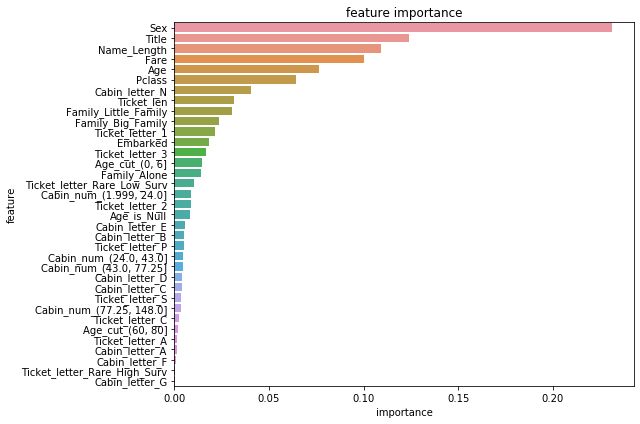

In [62]:
plt.figure(figsize=(9,6))
sns.barplot(x='importance',y='feature',data=importance_df.sort_values(by='importance',ascending=False))
plt.title('feature importance')
plt.tight_layout()

In [63]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm,classes,normalize=False,title='Confusion Matrix',cmap=plt.cm.Blues):
    if normalize:
        cm=cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix without normalization')
    print(cm)
    plt.imshow(cm,interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks=np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation=45)
    plt.yticks(tick_marks,classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('predicted label')
print(confusion_matrix(ytrain,ypredtrain,labels=[1,0]))


[[283  59]
 [ 31 518]]


Confusion matrix without normalization
[[283  59]
 [ 31 518]]


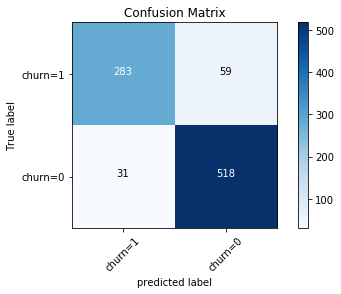

In [64]:
cnf_matrix=confusion_matrix(ytrain,ypredtrain,labels=[1,0])
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cnf_matrix,classes=['churn=1','churn=0'],normalize=False)

In [67]:
ypredtest=best_model.predict(Xtest)
submission=testdata.copy()
submission['Survived']=ypredtest
submission.to_csv('submission.csv',columns=['PassengerId','Survived'],index=False)
submission[['PassengerId','Survived']].head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
